In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.linalg
import math
from IPython.display import display, Math
sympy.init_printing()



## Equações do conversor matricial

In [2]:
# create functions 
t = sympy.symbols('t')
x = sympy.Function('x')(t)
Θ = sympy.Function('Θ')(t)
Θpfi = sympy.Function('Θ_pfi')(t)
Θpfo = sympy.Function('Θ_pfo')(t)
Θi = sympy.Function('Θi')(t)
Θo = sympy.Function('Θo')(t)
ωi = sympy.Function('ω_i')(t) 
ωo = sympy.Function('ω_o')(t) 


# constants
Vim, Iim, Viml, Vom, Iom, Voml = sympy.symbols('V_im I_im V_iml V_om I_om V_oml')


### Equações de entrada

As tensões de linha na entrada do conversor, antes do filtro, são definidas como:

In [3]:
# input voltage
VABt = sympy.Function('V_AB')(t) 
VBCt = sympy.Function('V_BC')(t) 
VCAt = sympy.Function('V_CA')(t) 

VAB = Vim * sympy.cos(ωi)
VBC = Vim * sympy.cos(ωi - (2*sympy.pi/3))
VCA = Vim * sympy.cos(ωi + (2*sympy.pi/3))

matrix_vars = sympy.Matrix([VABt, VBCt, VCAt])
matrix = sympy.Matrix([VAB, VBC, VCA])

input_voltage_grid = sympy.Eq(matrix_vars,matrix)
input_voltage_grid

            ⎡  Vᵢₘ⋅cos(ωᵢ(t))   ⎤
            ⎢                   ⎥
⎡V_AB(t)⎤   ⎢        ⎛        π⎞⎥
⎢       ⎥   ⎢-Vᵢₘ⋅cos⎜ωᵢ(t) + ─⎟⎥
⎢V_BC(t)⎥ = ⎢        ⎝        3⎠⎥
⎢       ⎥   ⎢                   ⎥
⎣V_CA(t)⎦   ⎢        ⎛        π⎞⎥
            ⎢-Vᵢₘ⋅sin⎜ωᵢ(t) + ─⎟⎥
            ⎣        ⎝        6⎠⎦

As correntes nas fases de entrada, então, podem ser definidas

In [4]:
# input current
IAt = sympy.Function('I_A')(t) 
IBt = sympy.Function('I_B')(t) 
ICt = sympy.Function('I_C')(t) 

IA = Iim * sympy.cos(ωi + Θpfi - (sympy.pi/6))
IB = Iim * sympy.cos(ωi + Θpfi - (sympy.pi/6) - (2*sympy.pi/3))
IC = Iim * sympy.cos(ωi + Θpfi - (sympy.pi/6) + (2*sympy.pi/3))

matrix_vars = sympy.Matrix([IAt, IBt, ICt])
matrix = sympy.Matrix([IA, IB, IC])

input_current_grid = sympy.Eq(matrix_vars,matrix)
input_current_grid

           ⎡       ⎛                   π⎞ ⎤
           ⎢Iᵢₘ⋅sin⎜Θ_pfi(t) + ωᵢ(t) + ─⎟ ⎥
⎡I_A(t)⎤   ⎢       ⎝                   3⎠ ⎥
⎢      ⎥   ⎢                              ⎥
⎢I_B(t)⎥ = ⎢        ⎛                   π⎞⎥
⎢      ⎥   ⎢-Iᵢₘ⋅cos⎜Θ_pfi(t) + ωᵢ(t) + ─⎟⎥
⎣I_C(t)⎦   ⎢        ⎝                   6⎠⎥
           ⎢                              ⎥
           ⎣  -Iᵢₘ⋅sin(Θ_pfi(t) + ωᵢ(t))  ⎦

As tensões de linha nos terminais do conversor são definidas como:

In [5]:
# input line voltage
VABLt = sympy.Function('V_ABL')(t) 
VBCLt = sympy.Function('V_BCL')(t) 
VCALt = sympy.Function('V_CAL')(t) 

VABL = Viml * sympy.cos(ωi + Θi)
VBCL = Viml * sympy.cos(ωi + Θi - (2*sympy.pi/3))
VCAL = Viml * sympy.cos(ωi + Θi + (2*sympy.pi/3))

matrix_vars = sympy.Matrix([VABLt, VBCLt, VCALt])
matrix = sympy.Matrix([VABL, VBCL, VCAL])

input_voltage_inv = sympy.Eq(matrix_vars,matrix)
input_voltage_inv

             ⎡  Vᵢₘₗ⋅cos(Θi(t) + ωᵢ(t))   ⎤
             ⎢                            ⎥
⎡V_ABL(t)⎤   ⎢         ⎛                π⎞⎥
⎢        ⎥   ⎢-Vᵢₘₗ⋅cos⎜Θi(t) + ωᵢ(t) + ─⎟⎥
⎢V_BCL(t)⎥ = ⎢         ⎝                3⎠⎥
⎢        ⎥   ⎢                            ⎥
⎣V_CAL(t)⎦   ⎢         ⎛                π⎞⎥
             ⎢-Vᵢₘₗ⋅sin⎜Θi(t) + ωᵢ(t) + ─⎟⎥
             ⎣         ⎝                6⎠⎦

### Equações de saída

Da mesma forma, pode-se definir as variáveis de saída do conversor

In [6]:
# input voltage
Vabt = sympy.Function('V_ab')(t) 
Vbct = sympy.Function('V_bc')(t) 
Vcat = sympy.Function('V_ca')(t) 

Vab = Vim * sympy.cos(ωo)
Vbc = Vim * sympy.cos(ωo - (2*sympy.pi/3))
Vca = Vim * sympy.cos(ωo + (2*sympy.pi/3))

matrix_vars = sympy.Matrix([Vabt, Vbct, Vcat])
matrix = sympy.Matrix([Vab, Vbc, Vca])

output_voltage_grid = sympy.Eq(matrix_vars, matrix)
output_voltage_grid

            ⎡  Vᵢₘ⋅cos(ωₒ(t))   ⎤
            ⎢                   ⎥
⎡V_ab(t)⎤   ⎢        ⎛        π⎞⎥
⎢       ⎥   ⎢-Vᵢₘ⋅cos⎜ωₒ(t) + ─⎟⎥
⎢V_bc(t)⎥ = ⎢        ⎝        3⎠⎥
⎢       ⎥   ⎢                   ⎥
⎣V_ca(t)⎦   ⎢        ⎛        π⎞⎥
            ⎢-Vᵢₘ⋅sin⎜ωₒ(t) + ─⎟⎥
            ⎣        ⎝        6⎠⎦

Portanto, as correntes de saída são definidas como sendo:

In [7]:
# output current
Iat = sympy.Function('I_a')(t) 
Ibt = sympy.Function('I_b')(t) 
Ict = sympy.Function('I_c')(t) 

Ia = Iim * sympy.cos(ωo + Θpfo - (sympy.pi/6))
Ib = Iim * sympy.cos(ωo + Θpfo - (sympy.pi/6) - (2*sympy.pi/3))
Ic = Iim * sympy.cos(ωo + Θpfo - (sympy.pi/6) + (2*sympy.pi/3))

matrix_vars = sympy.Matrix([Iat, Ibt, Ict])
matrix = sympy.Matrix([Ia, Ib, Ic])

output_current_grid = sympy.Eq(matrix_vars,matrix)
output_current_grid

           ⎡       ⎛                   π⎞ ⎤
           ⎢Iᵢₘ⋅sin⎜Θ_pfo(t) + ωₒ(t) + ─⎟ ⎥
⎡Iₐ(t) ⎤   ⎢       ⎝                   3⎠ ⎥
⎢      ⎥   ⎢                              ⎥
⎢I_b(t)⎥ = ⎢        ⎛                   π⎞⎥
⎢      ⎥   ⎢-Iᵢₘ⋅cos⎜Θ_pfo(t) + ωₒ(t) + ─⎟⎥
⎣I_c(t)⎦   ⎢        ⎝                   6⎠⎥
           ⎢                              ⎥
           ⎣  -Iᵢₘ⋅sin(Θ_pfo(t) + ωₒ(t))  ⎦

Por fim, as tensões de linha nos terminais de saída podem ser definidas

In [8]:
VabLt = sympy.Function('V_abL')(t) 
VbcLt = sympy.Function('V_bcL')(t) 
VcaLt = sympy.Function('V_acL')(t) 

VabL = Viml * sympy.cos(ωo + Θo)
VbcL = Viml * sympy.cos(ωo + Θo - (2*sympy.pi/3))
VcaL = Viml * sympy.cos(ωo + Θo + (2*sympy.pi/3))

matrix_vars = sympy.Matrix([VabLt, VbcLt, VcaLt])
matrix = sympy.Matrix([VabL, VbcL, VcaL])

output_voltage_inv = sympy.Eq(matrix_vars,matrix)
output_voltage_inv

             ⎡  Vᵢₘₗ⋅cos(Θo(t) + ωₒ(t))   ⎤
             ⎢                            ⎥
⎡V_abL(t)⎤   ⎢         ⎛                π⎞⎥
⎢        ⎥   ⎢-Vᵢₘₗ⋅cos⎜Θo(t) + ωₒ(t) + ─⎟⎥
⎢V_bcL(t)⎥ = ⎢         ⎝                3⎠⎥
⎢        ⎥   ⎢                            ⎥
⎣V_acL(t)⎦   ⎢         ⎛                π⎞⎥
             ⎢-Vᵢₘₗ⋅sin⎜Θo(t) + ωₒ(t) + ─⎟⎥
             ⎣         ⎝                6⎠⎦

## SVM 

The input reference voltage space vector is found to be

In [9]:
# constants
mi, mo = sympy.symbols('m_i m_o')
Vl, Vk, Vo = sympy.symbols('V_l V_k V_o')
Vn, Vm  = sympy.symbols('V_n V_m')

#  modulation index input
dl = mi * sympy.sin(sympy.pi/3 - Θi)
dk = mi * sympy.sin(Θi)
dio = 1 - dk -dl

Vi_ref = dl*Vl + dk*Vk + dio*Vo

#  modulation index output
dn = mo * sympy.sin(sympy.pi/3 - Θo)
dm = mo * sympy.sin(Θo)
doo = 1 - dm -dn

Vo_ref = dn*Vn + dm*Vm + doo*Vo

dq_gain_matrix = sympy.Matrix([[1, -0.5, -0.5],[0, sympy.sqrt(3)/2,-sympy.sqrt(3)/2]])

Vdit = sympy.Function('d_i')(t) 
Vqit = sympy.Function('q_i')(t) 
VimL = sympy.Function('V_im^\'')(t) 

Vdi = 3/2 * VimL * sympy.cos(ωi + Θi)
Vqi = 3/2 * VimL * sympy.sin(ωi + Θi)


matrix_vars = sympy.Matrix([Vdit, Vqit])
matrix = sympy.Matrix([Vdi, Vqi])

dq_transform = sympy.Eq(matrix_vars, matrix)
dq_transform

⎡dᵢ(t)⎤   ⎡1.5⋅V_im__'(t)⋅cos(Θi(t) + ωᵢ(t))⎤
⎢     ⎥ = ⎢                                 ⎥
⎣qᵢ(t)⎦   ⎣1.5⋅V_im__'(t)⋅sin(Θi(t) + ωᵢ(t))⎦

## Derivação das Equações Diferenciais do Conversor Matricial

Nas próximas subseções, as equações diferenciais do M3C são derivadas para obter o
modelo matemático que representa o conversor por espaço de estados. As subseções estão
organizadas em três partes: equações da entrada, de saída e da parte interna do conversor.

### Entrada do converor

In [10]:
#  Input side
# constants
Ri, Li, ωi = sympy.symbols('R_i L_i ω_i')
Lit = Li*(t)
Vcap = sympy.Function('V_cap')(t)
Idi = sympy.Function('I_di')(t)
Iqi = sympy.Function('I_qi')(t)
Ioi = sympy.Function('I_oi')(t)
Vdi = sympy.Function('V_di')(t)
Vqi = sympy.Function('V_qi')(t)
Voi = sympy.Function('V_oi')(t)
ddi = sympy.Function('d_di')(t)
dqi = sympy.Function('d_qi')(t)
doi = sympy.Function('d_oi')(t)
γdi = sympy.Function('γ_di')(t)
γqi = sympy.Function('γ_qi')(t)
mi = sympy.Function('m_i')(t)
Li_dt = Lit.diff(t)


G = sympy.Matrix([[1,-1,0],[0,1,-1],[-1,0,1]])
T2ABC = 2/3 * sympy.Matrix([[sympy.cos(ωi), -sympy.sin(ωi), 1],
                            [sympy.cos(ωi - (2*sympy.pi/3)), -sympy.sin(ωi - (2*sympy.pi/3)), 1],
                            [sympy.cos(ωi - (4*sympy.pi/3)), -sympy.sin(ωi - (4*sympy.pi/3)), 1]
                        ])
T2dqi = 2/3 * sympy.Matrix([[sympy.cos(ωi), sympy.cos(ωi - (2*sympy.pi/3)), sympy.cos(ωi - (4*sympy.pi/3))],
                            [-sympy.sin(ωi), -sympy.sin(ωi - (2*sympy.pi/3)), -sympy.sin(ωi - (4*sympy.pi/3))],
                            [1/2, 1/2, 1/2]
                        ])

# Input_kv = Vline_matrix* (Li_dt * sympy.Matrix([IA,IB,IC]) + Ri * sympy.Matrix([IA,IB,IC]))
# Input_kv
Iid_matrix = sympy.Matrix([[Idi],[Iqi],[Ioi]])
Vid_matrix = sympy.Matrix([[Vdi],[Vqi],[Voi]])
did_matrix = sympy.Matrix([[ddi],[dqi],[doi]])
# second_part = T2ABC*(Vid_matrix - Vcap*did_matrix) 
# second_part
γdi = 3/2 * mi * sympy.cos(Θi - sympy.pi/6)
γqi = 3/2 * mi * sympy.sin(Θi - sympy.pi/6)


impedance_matrix = sympy.Matrix([[-Ri, Li*ωi],[-Li*ωi, -Ri]])
first_part_matrix = Li_dt * sympy.Matrix([[Idi],[Iqi]])
second_part_matrix = impedance_matrix * sympy.Matrix([[Idi],[Iqi]]) +Vim*sympy.Matrix([[3/4],[-sympy.sqrt(3)/4]]) -(Vcap/sympy.sqrt(3))* sympy.Matrix([[γdi],[γqi]])
# second_part_matrix

eq_input = sympy.Eq(first_part_matrix, second_part_matrix)
eq_input

               ⎡                                                              
               ⎢Lᵢ⋅ωᵢ⋅I_qi(t) - Rᵢ⋅I_di(t) + 0.75⋅Vᵢₘ - 0.5⋅√3⋅V_cap(t)⋅mᵢ(t)⋅
⎡Lᵢ⋅I_di(t)⎤   ⎢                                                              
⎢          ⎥ = ⎢                                                              
⎣Lᵢ⋅I_qi(t)⎦   ⎢                              √3⋅Vᵢₘ                          
               ⎢-Lᵢ⋅ωᵢ⋅I_di(t) - Rᵢ⋅I_qi(t) - ────── + 0.5⋅√3⋅V_cap(t)⋅mᵢ(t)⋅c
               ⎣                                4                             

   ⎛        π⎞⎤
sin⎜Θi(t) + ─⎟⎥
   ⎝        3⎠⎥
              ⎥
  ⎛        π⎞ ⎥
os⎜Θi(t) + ─⎟ ⎥
  ⎝        3⎠ ⎦

### Saída Conversor

In [11]:
# constants
Ro, Lo, ωo = sympy.symbols('R_o L_o ω_o')
Lot = sympy.Function('L_o')(t)

Ido = sympy.Function('I_do')(t)
Iqo = sympy.Function('I_qo')(t)
Ioo = sympy.Function('I_oo')(t)
Vdo = sympy.Function('V_do')(t)
Vqo = sympy.Function('V_qo')(t)
Voo = sympy.Function('V_oo')(t)
ddo = sympy.Function('d_do')(t)
dqo = sympy.Function('d_qo')(t)
doo = sympy.Function('d_oo')(t)
γdo = sympy.Function('γ_do')(t)
γqo = sympy.Function('γ_qo')(t)
mo = sympy.Function('m_i')(t)
Lo_dt = Lot.diff(t)


Iod_matrix = sympy.Matrix([[Ido],[Iqo],[Ioo]])
Vod_matrix = sympy.Matrix([[Vdo],[Vqo],[Voo]])
dod_matrix = sympy.Matrix([[ddo],[dqo],[doo]])
# second_part = T2ABC*(Vid_matrix - Vcap*did_matrix) 
# second_part
γdo = 3/2 * mo * sympy.cos(Θo - sympy.pi/6)
γqo = 3/2 * mo * sympy.sin(Θo - sympy.pi/6)


impedance_matrix_out = sympy.Matrix([[-Ro, Lo*ωo],[-Lo*ωo, -Ro]])
first_part_matrix_out = Lo_dt * sympy.Matrix([[Ido],[Iqo]])
second_part_matrix_out = impedance_matrix_out * sympy.Matrix([[Ido],[Iqo]]) +Vom*sympy.Matrix([[3/4],[-sympy.sqrt(3)/4]]) -(Vcap/sympy.sqrt(3))* sympy.Matrix([[γdo],[γqo]])
# second_part_matrix

eq_output = sympy.Eq(first_part_matrix_out, second_part_matrix_out)
eq_output

⎡        d        ⎤   ⎡                                                       
⎢I_do(t)⋅──(Lₒ(t))⎥   ⎢Lₒ⋅ωₒ⋅I_qo(t) - Rₒ⋅I_do(t) + 0.75⋅Vₒₘ - 0.5⋅√3⋅V_cap(t)
⎢        dt       ⎥   ⎢                                                       
⎢                 ⎥ = ⎢                                                       
⎢        d        ⎥   ⎢                              √3⋅Vₒₘ                   
⎢I_qo(t)⋅──(Lₒ(t))⎥   ⎢-Lₒ⋅ωₒ⋅I_do(t) - Rₒ⋅I_qo(t) - ────── + 0.5⋅√3⋅V_cap(t)⋅
⎣        dt       ⎦   ⎣                                4                      

          ⎛        π⎞⎤
⋅mᵢ(t)⋅sin⎜Θo(t) + ─⎟⎥
          ⎝        3⎠⎥
                     ⎥
         ⎛        π⎞ ⎥
mᵢ(t)⋅cos⎜Θo(t) + ─⎟ ⎥
         ⎝        3⎠ ⎦

### Internal Capacitor Equations

In [12]:
C  = sympy.symbols('C')
Ct = sympy.Function('C')(t)
Cdt = Ct.diff(t)

input_part_cap = ( sympy.Matrix([[γdi ,γqi]]) * sympy.Matrix([[Idi] ,[Iqi]]) ) 
output_part_cap = ( sympy.Matrix([[γdo ,γqo]]) * sympy.Matrix([[Ido] ,[Iqo]]) ) 
cap_first_matrix = Cdt * Vcap
cap_second_matrix = 2/(3*sympy.sqrt(3)) *  input_part_cap * output_part_cap


eq_cap = sympy.Eq(cap_first_matrix, cap_second_matrix)
eq_cap


## State Space Representation 
$\dot{x(t)} = Ax(t) + Bu(t)$

$y(t) = Cx(t) + Du(t)$

<!-- $\dot{x(t)} =
\begin{bmatrix}
\dot{x} \\
\ddot{x} \\
\dot{\theta} \\
\ddot{\theta} \\
\dot{\alpha} \\
\ddot{\alpha}
\end{bmatrix}
$ &nbsp;&nbsp;&nbsp;&nbsp; $x(t) =
\begin{bmatrix}
x \\
\dot{x} \\
\theta \\
\dot{\theta} \\
\alpha \\
\dot{\alpha}
\end{bmatrix}
$

let $p = I^2M + 2I^2m + 3IMl^2m + Il^2m^2 + Ml^4m^2$ -->

$\left[A\right] =
		\begin{bmatrix}
			0                                 & \frac{2}{3\sqrt{3}C}\Gamma_{di} & \frac{2}{3\sqrt{3}C}\Gamma_{qi} & -\frac{2}{3\sqrt{3}C}\Gamma_{do} & -\frac{2}{3\sqrt{3}C}\Gamma_{qo} \\
			\frac{-1}{\sqrt{3}L_i}\Gamma_{di} & -\frac{R_i}{L_i}                & \omega_i                        & 0                                & 0                                \\
			\frac{-1}{\sqrt{3}L_i}\Gamma_{qi} & -\omega_i                       & -\frac{R_i}{L_i}                & 0                                & 0                                \\
			\frac{1}{\sqrt{3}L_o}\Gamma_{do}  & 0                               & 0                               & -\frac{R_o}{L_o}o                & \omega_o                         \\
			\frac{1}{\sqrt{3}L_o}\Gamma_{qo}  & 0                               & 0                               & -\omega_o                        & -\frac{R_o}{L_o}                 \\
		\end{bmatrix}
$ &nbsp;&nbsp;&nbsp;&nbsp; $\left[B\right] =
		\begin{bmatrix}
			\frac{2I_{di}}{3\sqrt{3}C}    & \frac{2I_{qi}}{3\sqrt{3}C}    & -\frac{2I_{do}}{3\sqrt{3}C}  & -\frac{2I_{qo}}{3\sqrt{3}C}      \\
			-\frac{1}{\sqrt{3}L_i}V_{cap} & 0                             & 0                            &                              & 0 \\
			0                             & -\frac{1}{\sqrt{3}L_i}V_{cap} & 0                            & 0                                \\
			0                             & 0                             & \frac{1}{\sqrt{3}L_o}V_{cap} & 0                                \\
			0                             & 0                             & 0                            & \frac{1}{\sqrt{3}L_o}V_{cap}
		\end{bmatrix}
$ 

$C = 
 \begin{bmatrix}
  1 & 0 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 & 0 \\
  0 & 0 & 1 & 0 & 0 \\
  0 & 0 & 0 & 1 & 0 \\
  0 & 0 & 0 & 0 & 1 
 \end{bmatrix}
$ &nbsp;&nbsp;&nbsp;&nbsp; $D = 
 \begin{bmatrix}
  0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0 \\
 \end{bmatrix}
$

### Análise em regime permanente 

In [13]:
mi, mo, θi, θo = sympy.symbols('m_i m_o θ_i θ_o')     

angle_in = math.pi/6
angle_out = math.pi/6
# angle_out =  math.pi - math.pi/6 # 180 degres more, is injecting on output

Γdi_exp = 3/2 * mi * sympy.cos(θi - angle_in)
Γqi_exp = 3/2 * mi * sympy.sin(θi - angle_in)
# Γdo_exp = 3/2 * mo * sympy.cos(angle_out - θo)
# Γqo_exp = 3/2 * mo * sympy.sin(angle_out - θo)
Γdo_exp = 3/2 * mo * sympy.cos(θo - angle_out)
Γqo_exp = 3/2 * mo * sympy.sin(θo - angle_out)

pfi = 1 # fator de potencia de entrada
pfo = 0.95 # fator de potencia de saida
Vin = 240 
Vout = 240
Vcap = 241

# Cálculo do ângulo da entrada em radianos
θpfi = math.acos(pfi)
# Cálculo do ângulo da saída em radianos
θpfo = math.acos(pfo)

Vin_dref = 3/2 * Vin * math.cos(θpfi) # d ref voltage from input
Vin_qref = 3/2 * Vin * math.sin(θpfi) # q ref voltage from input
Vin_vec = np.array([Vin_dref, Vin_qref]) 
Vin_m = np.linalg.norm(Vin_vec)

Vout_dref = 3/2 * Vout * math.cos(θpfo) # d ref voltage from input
Vout_qref = 3/2 * Vout * math.sin(θpfo) # q ref voltage from input
Vout_vec = np.array([Vout_dref, Vout_qref]) 
Vout_m = np.linalg.norm(Vout_vec)
print(Vout_dref,Vout_qref,Vout_m)

mix = 2/3 * (Vin_m/Vcap)
mox = 2/3 * (Vout_m/Vcap)

Γdi = Γdi_exp.subs([(mi,mix), (θi, θpfi)]).evalf()
Γqi = Γqi_exp.subs([(mi,mix), (θi, θpfi)]).evalf()
Γdo = Γdo_exp.subs([(mo,mox), (θo, θpfo)]).evalf()
Γqo = Γqo_exp.subs([(mo,mox), (θo, θpfo)]).evalf()
Γdi
print('Γdi:', Γdi, 'Γqi:', Γqi, 'Γdo:', Γdo, 'Γqo:', Γqo)



342.0 112.40996397117121 360.0
Γdi: 1.29364790606804 Γqi: -0.746887966804979 Γdo: 1.46218120365089 Γqo: -0.305602139263370


In [14]:
# Tensões e corrente no ponte de operação escolhido
Fi = 25
Fo = 60
Iom = 20

C= 10e-6
Ri= 0.002
Li= 0.0002
Ro= 0.002
Lo= 0.0002
ωi= Fi*2*math.pi
ωo= Fo*2*math.pi

Vtdo = 3/2 * (Vout + math.sqrt(3)*Iom * (math.cos(θpfo)*Ro - math.sin(θpfo)*Lo*ωo))
Vtqo = 3*math.sqrt(3)/2 *Iom* ( math.sin(θpfo)*Ro - math.cos(θpfo)*Lo*ωo)
Iim = (Vin * math.cos(θpfi) - math.sqrt( math.pow(Vin * math.cos(θpfi),2) -4*math.sqrt(3) * Ri*Vout*math.cos(θpfo)*Iom -12*Ri*Ro*math.pow(Iom,2)) )/(2*math.sqrt(3)*Ri)
Vtdi = 3/2 * (Vin + math.sqrt(3)*Iim * (math.cos(θpfi)*Ri - math.sin(θpfi)*Li*ωi))
Vtqi = 3*math.sqrt(3)/2 *Iim* ( math.sin(θpfi)*Ri - math.cos(θpfi)*Li*ωi)
print("Vtdo:" ,Vtdo, "Vtqo:" ,Vtqo, "Iim:" ,Iim, "Vtdi:" ,Vtdi, "Vtqi:" ,Vtqi,)

# Ido = 3/2 * -Iom * math.cos(angle_out - θpfo) 
# Iqo = 3/2 * -Iom * math.sin(angle_out - θpfo) 
Ido = 3/2 * Iom * math.cos(θpfo - angle_out) 
Iqo = 3/2 * Iom * math.sin(θpfo - angle_out) 

Idi = 3/2 * Iim * math.cos(θpfi - angle_in) 
Iqi = 3/2 * Iim * math.sin(θpfi - angle_in)

print("Ido:", Ido, "Iqo:", Iqo, "Idi:", Idi, "Iqi:", Iqi)  # Output: [0.5       0.8660254 0.       ]


# Γdi= 1.29
# Γqi= -0.75
# Γdo= 1.30
# Γqo= -0.73
# Idi= 24.69
# Iqi= -14.26
# Ido= 19.99
# Iqo= -22.36
# Vcap= 240.89

Vtdo: 358.8753921689244 Vtqo: -3.6894663339294396 Iim: 19.010990118506466 Vtdi: 360.0987840023623 Vtqi: -1.5516954805684513
Ido: 29.3654725066553 Iqo: -6.137509630206018 Idi: 24.696000590582305 Iqi: -14.258242588879847


In [15]:
# state space model

# s= sympy.symbols('s')
# s5 = s**5
# s4 = 4*(Ri/Li)*s**4
# s3 = (6*(Ri/Li)**2 + (mix**2 + mox**2)/(2*Li*C) + (ωi**2 + ωo**2))*s**3
# s2 = (4*(Ri/Li)**3 + (3*Ri*(mix**2 + mox**2))/(2*Li*C) + 2*(Ri/Li)*(ωi**2 + ωo**2) )*s**2
# s1 = ((Ri/Li)**4 + (mix**2*ωo**2 + mox*2*ωi**2)/(2*Li*C) + (3*Ri**2*(mix**2 + mox**2))/(2*Li**3*C) + (Ri/Li)**2*(ωi**2 + ωo**2)+ωi**2 * ωo**2)*s
# s0 = (Ri**3*(mix**2 + mox**2))/(2*Li**4*C) + (Ri*(mix**2*ωo**2 + mox**2*ωi**2))/(2*Li**2*C)

# eq = s5 + s4 + s3 + s2 + s1 + s0


A = np.matrix([
    [0, 2*Γdi/(3*math.sqrt(3)*C), 2*Γqi/(3*math.sqrt(3)*C), -2*Γdo/(3*math.sqrt(3)*C), -2*Γqo/(3*math.sqrt(3)*C)],
    [-Γdi/(math.sqrt(3)*Li), -Ri/Li, ωi, 0, 0],
    [-Γqi/(math.sqrt(3)*Li), -ωi, -Ri/Li, 0, 0],
    [Γdo/(math.sqrt(3)*Lo), 0, 0, -Ro/Lo, -ωo],
    [Γqo/(math.sqrt(3)*Lo), 0, 0, -ωo, -Ro/Lo],
], dtype='float64')

B = np.matrix([
    [(2*Idi/(3*math.sqrt(3)*C)) , (2*Iqi/(3*math.sqrt(3)*C)) , (-2*Ido/(3*math.sqrt(3)*C)) , (-2*Iqo/(3*math.sqrt(3)*C))],
    [(-Vcap/(math.sqrt(3)*Li)) , 0, 0, 0,],
    [0, (-Vcap/(math.sqrt(3)*Li)) , 0, 0],
    [0, 0, (Vcap/(math.sqrt(3)*Lo)) , 0],
    [0, 0, 0, (Vcap/(math.sqrt(3)*Lo)) ],
], dtype='float64')

C = np.matrix([
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,0,1,0,0],
    [0,0,0,1,0],
    [0,0,0,0,1],
], dtype='float64')

D = np.matrix([
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
], dtype='float64')


A última etapa antes de projetar um controlador de realimentação é uma análise do modelo em malha aberta. Uma análise do sistema em malha aberta revela características importantes, como sua estabilidade e desempenho.

A estabilidade de um sistema de espaço de estados linear e invariante no tempo em malha aberta é determinada pela localização de seus polos. Os polos de um sistema de espaço de estados são definidos como os autovalores de sua matriz A, chamada matriz de dinâmica de estados do sistema. Esses autovalores podem ser encontrados resolvendo o polinômio característico do sistema, que é encontrado da seguinte forma:

Um sistema é considerado estável se as partes reais de todos os seus polos forem negativas, ou seja, se todos os polos estiverem localizados à esquerda do eixo imaginário. As partes reais dos cinco polos do polinômio característico são negativas. Portanto, para a ampla gama de pontos de operação especificados pelos parâmetros listados acima, o conversor matricial é estável. Na verdade, as partes reais dos polos dependem principalmente do fator R/L. Elas são aproximadamente R/2L para os polos P1 e P2, e R/L para P3, P4 e P5.


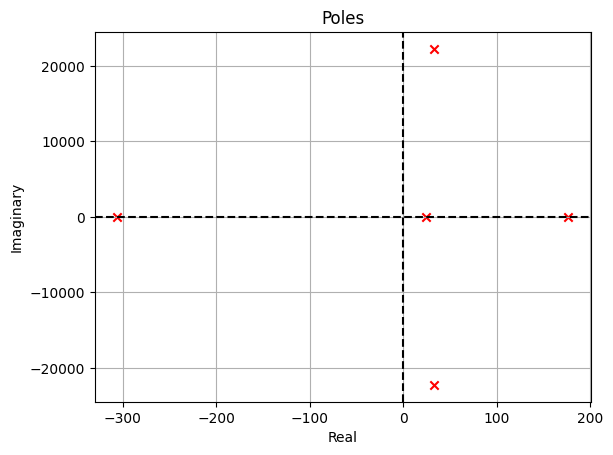

Estável: False


In [16]:
# plotar os polos para analisar a estabilidade do sistema em malha aberta
poles = scipy.linalg.eigvals(A)
plt.scatter([p.real for p in poles], [p.imag for p in poles], color='red', marker='x')
plt.axvline(0, color='k', linestyle='dashed')
plt.axhline(0, color='k', linestyle='dashed')
plt.grid(True)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Poles')
plt.show()
poles
# Verifique se todos os polos têm parte real negativa (sistema estável)
is_stable = all(np.real(pole) < 0 for pole in poles)

print("Estável:", is_stable)

### controlabilidade do sistema

A condição de controlabilidade para um sistema linear invariante no tempo pode ser verificada através da matriz de controlabilidade $C$
A matriz de controlabilidade $C$ é construída concatenando as potências da matriz $A$ multiplicadas por $B$:

$
\mathcal{C} = [B, AB, A^2B, A^3B, \ldots]
$

Agora, a condição para controlabilidade é que a matriz de controlabilidade seja de posto completo, ou seja, o posto de $C$ deve ser igual ao número de variáveis de estado $n$. Isso é representado como:

$
\text{rank}(\mathcal{C}) = n
$

Portanto, a condição completa para verificar a controlabilidade do sistema é:

$
\text{rank}([B, AB, A^2B, A^3B, \ldots]) = n
$

In [17]:
# system controllability - if rank[B, AB, A^2B, A^3B ...] == n, it is controllable
RM = np.concatenate([np.linalg.matrix_power(A, power) * B for power in range(A.shape[0])], axis=1)
if np.linalg.matrix_rank(RM) == A.shape[0]:
    print('System is controllable')
else:
    print('System is NOT controllable!')

System is controllable


### observabilidade do sistema

a matriz de observabilidade $O$ é formada concatenando as matrizes $\begin{bmatrix} C \\ CA \\ CA^2 \\ CA^3 \\ \vdots\end{bmatrix}$:

$
\mathcal{O} = \begin{bmatrix} C \\ CA \\ CA^2 \\ CA^3 \\ \vdots \end{bmatrix}
$

A condição para observabilidade é que a matriz de observabilidade seja de posto completo, ou seja, o posto de $O$ deve ser igual ao número de variáveis de estado $n$:

$
\text{rank}(\mathcal{O}) = n
$

Portanto, a condição completa para verificar a observabilidade do sistema é:

$
\text{rank}\left(\begin{bmatrix} C \\ CA \\ CA^2 \\ CA^3 \\ \vdots \end{bmatrix}\right) = n
$

In [18]:
# system observability - if rank [C, CA, CA^2 ...] == n, it is observable
OM = np.concatenate([C * np.linalg.matrix_power(A, power) for power in range(A.shape[0])], axis=0)
if np.linalg.matrix_rank(OM) == A.shape[0]:
    print('System is observable')
else:
    print('System is NOT observable!')

System is observable


### Visão Geral do Sistema
O sistema é controlável e observável, e como possui polos no lado direito do plano complexo, é instável.

Pólos do sistema: [  32.74568538+22266.68243218j   32.74568538-22266.68243218j
 -305.55439913    +0.j          176.21172913    +0.j
   23.85129923    +0.j        ]


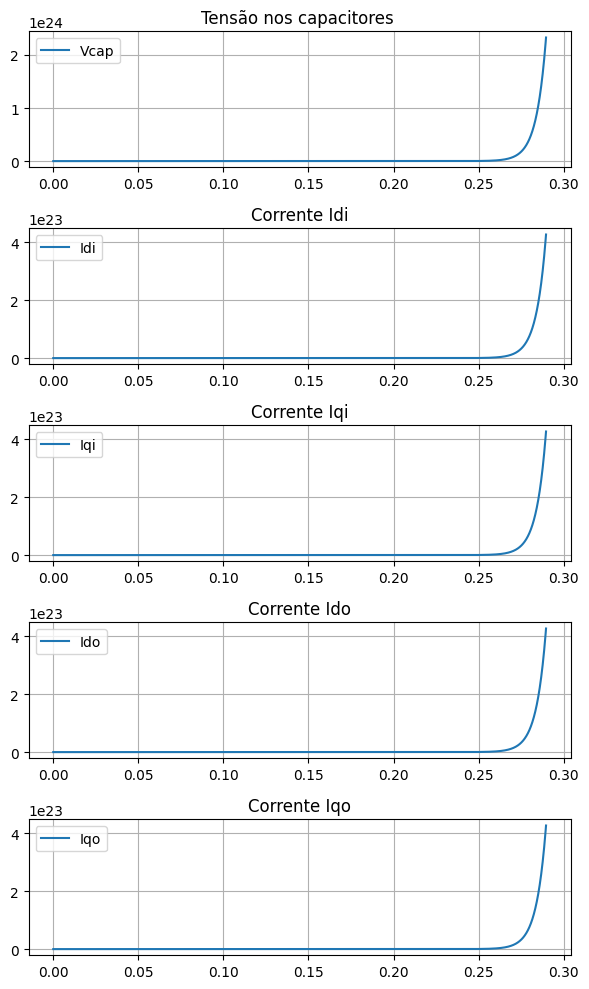

In [19]:
# system has poles in the right hand plane and looks unstable, simulate the step response with 0 initial conditions
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Criar uma representação de espaço de estados do sistema
sys = ctrl.ss(A, B, C, D)
# Verificando a estabilidade do sistema
print("Pólos do sistema:", ctrl.pole(sys))

# Simular a resposta ao degrau
time, response = ctrl.step_response(sys)

fig, axs = plt.subplots(5, 1, figsize=(6, 10))

# Plotar no primeiro subplot
axs[0].plot(time, response[0][0], label='Vcap')
axs[0].set_title('Tensão nos capacitores ')
axs[0].legend()
axs[0].grid(True)

# Plotar no segundo subplot
axs[1].plot(time, response[0][1], label='Idi')
axs[1].set_title('Corrente Idi')
axs[1].legend()
axs[1].grid(True)

# Plotar no terceiro subplot
axs[2].plot(time, response[0][1], label='Iqi')
axs[2].set_title('Corrente Iqi')
axs[2].legend()
axs[2].grid(True)

# Plotar no terceiro subplot
axs[3].plot(time, response[0][1], label='Ido')
axs[3].set_title('Corrente Ido')
axs[3].legend()
axs[3].grid(True)

# Plotar no terceiro subplot
axs[4].plot(time, response[0][1], label='Iqo')
axs[4].set_title('Corrente Iqo')
axs[4].legend()
axs[4].grid(True)

# Ajustar layout para evitar sobreposição
plt.tight_layout()



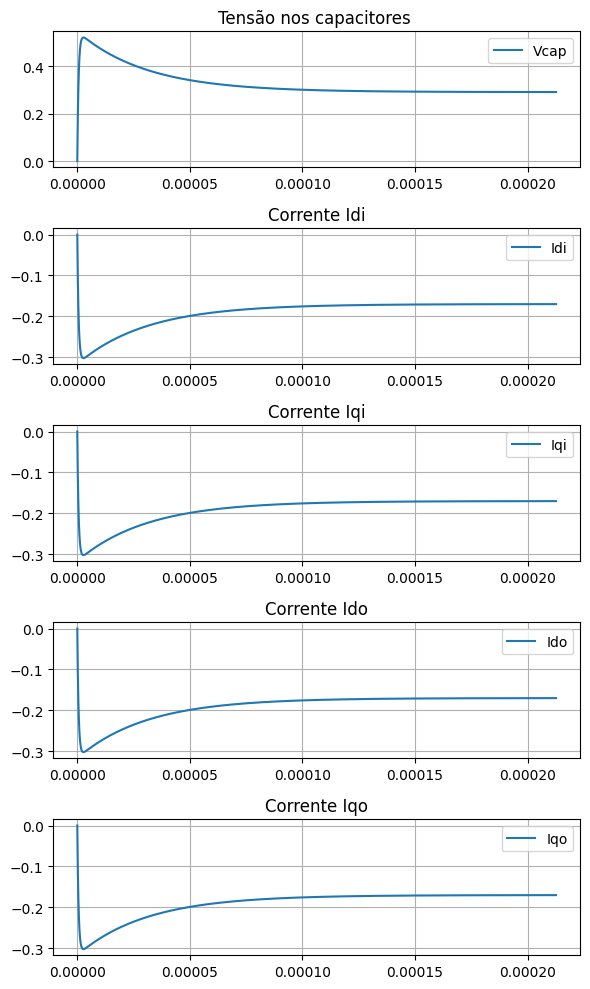

In [20]:
# somente para mostrar que a planta consegue ficar estavel vamos usar um controlador LQR
# o problema dess controlador que para cada ponto de operação seria necessario recalcular os parametros

# sistema de controle MIMO
system = ctrl.ss(A, B, C, D)

# matrizes de ponderação Q e R
Q = np.eye(5)  # Ponderação nos estados
R = np.eye(4)  # Ponderação nas entradas

# controlador LQR
K, S, E = ctrl.lqr(system, Q, R)

#sistema de controle com o controlador LQR
controlled_system = ctrl.feedback(system, K)

#  resposta ao degrau
time, response = ctrl.step_response(controlled_system)

# Plotar a resposta ao degrau
fig, axs = plt.subplots(5, 1, figsize=(6, 10))

# Plotar no primeiro subplot
axs[0].plot(time, response[0][0], label='Vcap')
axs[0].set_title('Tensão nos capacitores ')
axs[0].legend()
axs[0].grid(True)

# Plotar no segundo subplot
axs[1].plot(time, response[0][1], label='Idi')
axs[1].set_title('Corrente Idi')
axs[1].legend()
axs[1].grid(True)

# Plotar no terceiro subplot
axs[2].plot(time, response[0][1], label='Iqi')
axs[2].set_title('Corrente Iqi')
axs[2].legend()
axs[2].grid(True)

# Plotar no terceiro subplot
axs[3].plot(time, response[0][1], label='Ido')
axs[3].set_title('Corrente Ido')
axs[3].legend()
axs[3].grid(True)

# Plotar no terceiro subplot
axs[4].plot(time, response[0][1], label='Iqo')
axs[4].set_title('Corrente Iqo')
axs[4].legend()
axs[4].grid(True)

# Ajustar layout para evitar sobreposição
plt.tight_layout()


Polos CL: [-1737809.96307101  +0.j           -32482.2471183   +0.j
  -695720.48410604+113.06536675j  -695720.48410604-113.06536675j
  -695707.17875429  +0.j        ]
Estável: True


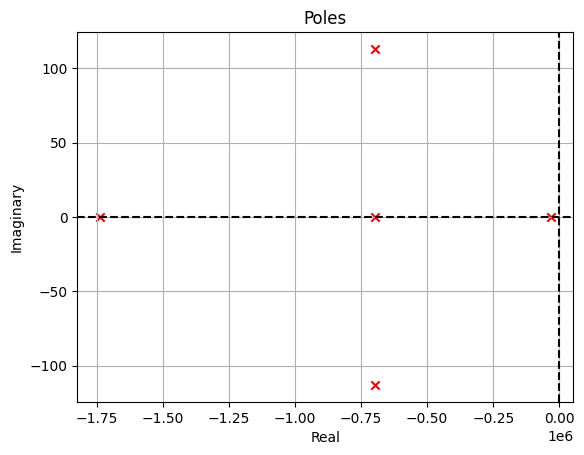

In [21]:
# plotar os polos para analisar a estabilidade do sistema em malha fechada

poles = ctrl.pole(controlled_system)
print("Polos CL:", poles)

# Verifique se todos os polos têm parte real negativa (sistema estável)
is_stable = all(np.real(pole) < 0 for pole in poles)

print("Estável:", is_stable)

plt.scatter([p.real for p in poles], [p.imag for p in poles], color='red', marker='x')
plt.axvline(0, color='k', linestyle='dashed')
plt.axhline(0, color='k', linestyle='dashed')
plt.grid(True)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Poles')
plt.show()


o sistema fica estável, mas para controlar, vamos usar outra abordagem.

## Controle M3C

### Controle de entrada

$\frac{\hat{i_{di}}(s)}{\hat{ d_{di}}(s)}=  - \frac{\sqrt{3}V_{cap}}{3L_is+3R_i}$

$\frac{\hat{i_{qi}}(s)}{\hat{ d_{qi}}(s)}=  - \frac{\sqrt{3}V_{cap}}{3L_is+3R_i}$

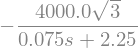

In [22]:
s = sympy.symbols('s')

Vcap = 4e3
Ri = 750e-3
Li = 25e-3
tf_id_in = - sympy.sqrt(3)*Vcap/(3*Li*s+3*Ri)
tf_id_in

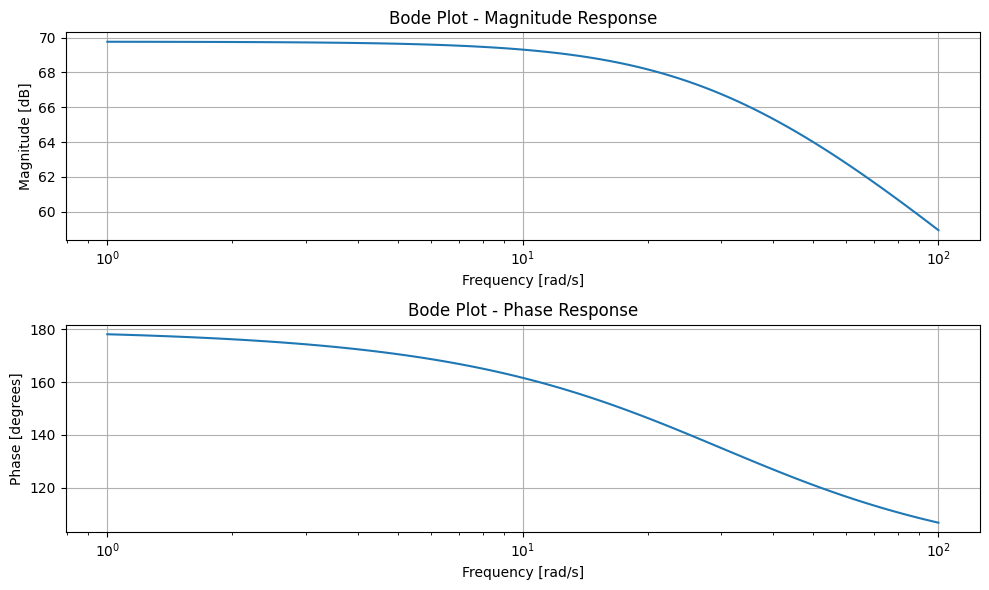

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import signal

# Convert the transfer function to a polynomial (numerator, denominator)
numerator, denominator = sp.fraction(tf_id_in)
numerator_coeffs = sp.Poly(numerator, s).all_coeffs()
denominator_coeffs = sp.Poly(denominator, s).all_coeffs()

# Create a TransferFunction object
sys = signal.TransferFunction(np.array(numerator_coeffs, dtype=float), np.array(denominator_coeffs, dtype=float))

# Frequency range for Bode plot
frequencies, magnitudes, phases = signal.bode(sys)

# Plot the magnitude response
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(frequencies, magnitudes)
plt.title('Bode Plot - Magnitude Response')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)

# Plot the phase response
plt.subplot(2, 1, 2)
plt.semilogx(frequencies, phases)
plt.title('Bode Plot - Phase Response')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.grid(True)

plt.tight_layout()
plt.show()

### Controle de saída

$\frac{\hat{i_{do}}(s)}{\hat{ d_{do}}(s)}=   \frac{\sqrt{3}V_{cap}}{3L_os+3R_o}$

$\frac{\hat{i_{qo}}(s)}{\hat{ d_{qo}}(s)}=   \frac{\sqrt{3}V_{cap}}{3L_os+3R_o}$